<a href="https://colab.research.google.com/github/zal-developer/Intermediate-ML/blob/main/Project_4_part_1_Zalwango_Diana_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADULT INCOME DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [ ]:
# Load and preview data
fpath ="/content/drive/MyDrive/adult/adult.csv"
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


a) What is the target? (You are required to complete a classification task for this project)

- The target variable in this dataset is whether an individual's income exceeds 50K per year or not. It's a binary classification task where the goal is to predict whether a person's income is above or below a certain threshold.



b) What does one row represent? (A person? A business? An event? A product?)

- A person

c)  How many features does the data have?

  -  15 features

d)  How many rows are in the dataset?

  - 48842 rows

e) What opportunities exist for dimensionality reduction or feature selection with this dataset?

- Removing redundant or irrelevant features.

- Using techniques like Principal Component Analysis or feature importance ranking to select the most informative features.

f) What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

- There are missing values and unknown values in the data,represented by ? and 'unknown'.
-  There may be imbalanced classes more so in the target where one class dominates the other.
- determining which features influence the highest levels of the target.
- Handling categorical variables and encoding them appropriately for modeling.


# Explore/clean the data

In [ ]:
#checking null values
df.isnull().sum().sum()

0

In [ ]:
#checking values with ?
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
#Replacing ? with Nan
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

b) Deleting duplicate rows.

In [ ]:
# Count the duplicates
df.duplicated().sum()

52

In [ ]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


d) Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [ ]:
#solving inconsistencies in marital-status
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed']:
        return 'single'
    else:
        return 'divorced'

df['marital-status'] = df['marital-status'].apply(convert_marital_status)

In [ ]:
#identifying object cols
string_cols=df.select_dtypes('object').columns
for col in string_cols:
#showing value counts for each object column
  print(f'value_counts for {col}')
  print(df[col].value_counts())
  print('\n')

value_counts for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


value_counts for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


value_counts for marital-status
marital-status
married     23030
single      19130
divorced     6630
Name: count, dtype: int64


value_counts for occupation
occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-servic

In [ ]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

Exploratory Visualizations

Creating exploratory visualizations to understand your data and search for trends.


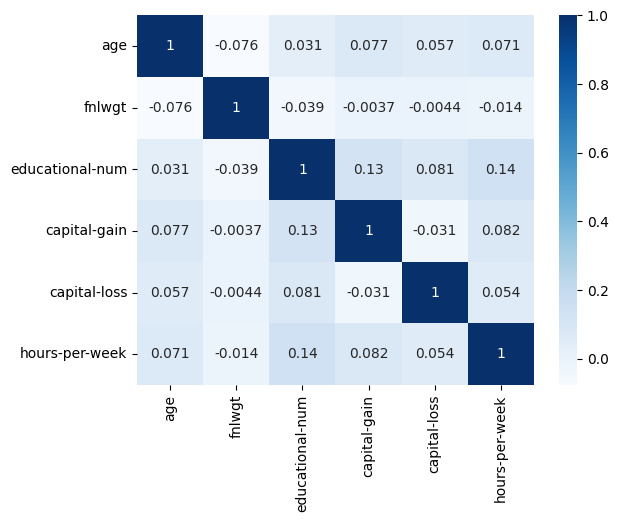

In [ ]:
# Make a heatmap of correlations
# Get correlations
corr = df.corr(numeric_only = True)
# Include annotations on the heatmap
sns.heatmap(corr, cmap = 'Blues', annot = True);

- From the heatmap,there seems to be very weak correlation between the features from both the positive and negative ends.

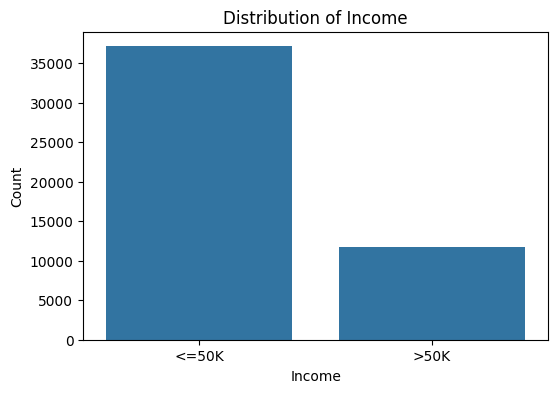

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

- There seems to be more persons getting <=50k than >50k.

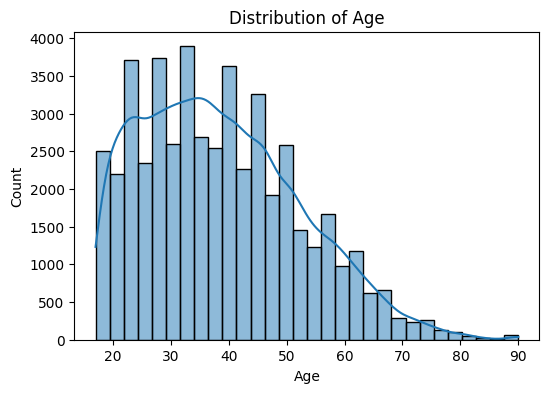

In [ ]:
# Distribution of age
plt.figure(figsize=(6, 4))
sns.histplot(x='age', data=df, bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- A larger population in the workforce is between 20-60years.

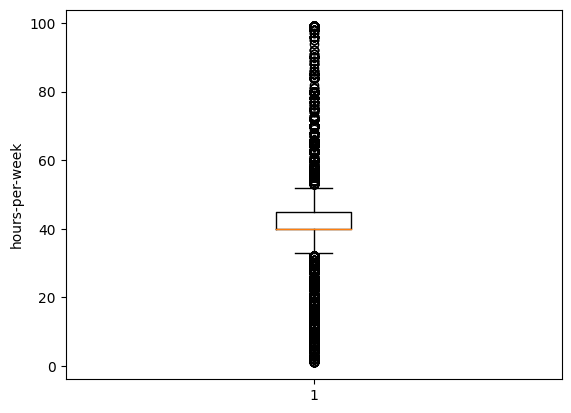

In [ ]:
# create boxplot for the hours worked
fig, ax = plt.subplots()
data = df["hours-per-week"]
ax.boxplot(data);
ax.set_ylabel("hours-per-week");

- The median hours worked are about 40 per week.
- There are many outliers who work for less than 20 hours and also more than 50hours per week.

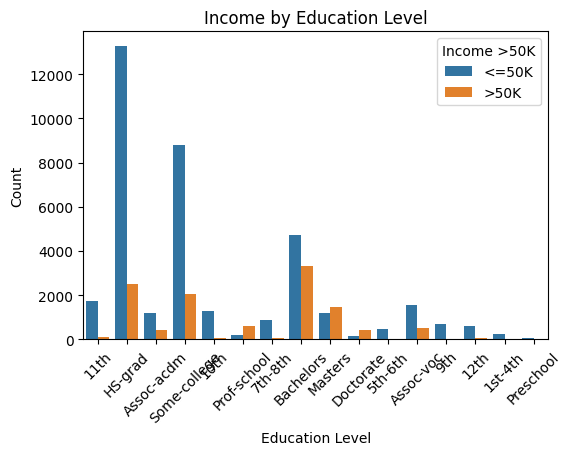

In [ ]:
# Relationship between education and income
plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='income', data=df)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income >50K', loc='upper right')
plt.show()

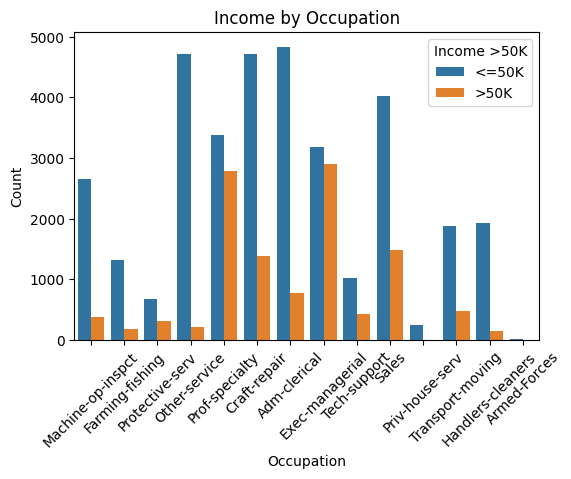

In [ ]:
# Relationship between occupation and income
plt.figure(figsize=(6, 4))
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income >50K', loc='upper right')
plt.show()

Choose a model

Preprocess data

Fit and evaluate a default model

In [ ]:
# chosing KNN model
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()

In [ ]:
# Drop irrelevant and high cardinality features
cols_drop = ['native-country','educational-num']
# Create features matrix and target vector
X = df.drop(columns = [*cols_drop, 'income'])
y = df['income']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# fit the col_transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)

In [ ]:
# Get the names of the transformed features
transformed_feature_names = col_transformer.get_feature_names_out()

# Create a new DataFrame with the transformed features
X_train_ohe = pd.DataFrame(X_train_tf, columns=transformed_feature_names)

# Display the first few rows of the transformed DataFrame
X_train_ohe.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_NA,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_divorced,marital-status_married,marital-status_single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_NA,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,3.166708,0.043804,-0.145433,-0.217031,-2.608202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.634069,-1.341547,-0.145433,-0.217031,0.766978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.780252,1.422558,0.264526,-0.217031,0.365171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.364987,-0.534230,-0.145433,-0.217031,-2.045672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.023758,-1.159652,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Define KNN model pipeline
knn_pipe = make_pipeline(col_transformer, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.91      0.94      0.92     27841
        >50K       0.79      0.70      0.74      8751

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592



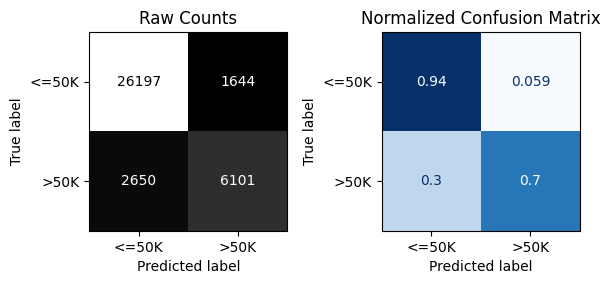


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      9268
        >50K       0.67      0.58      0.62      2930

    accuracy                           0.83     12198
   macro avg       0.77      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198



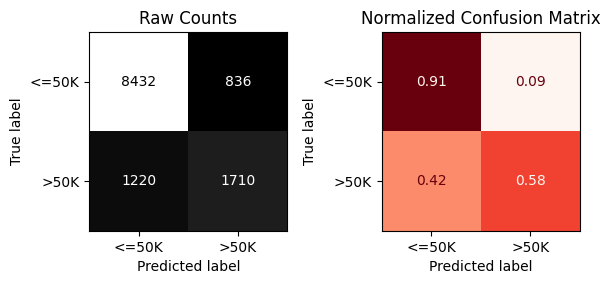

In [ ]:
#evaluate
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

Extract and visualize the top 10 features using permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
result = permutation_importance(knn_pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

# Extract the importance and standard deviation
importances = result.importances_mean
std = result.importances_std

In [ ]:
# Get feature names
feature_names = X.columns

# Create a DataFrame to hold feature importances
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances,
    'std': std
})

# Sort by importance and select the top 10 features
top_10_features = feature_importances.sort_values(by='importance', ascending=False).head(10)


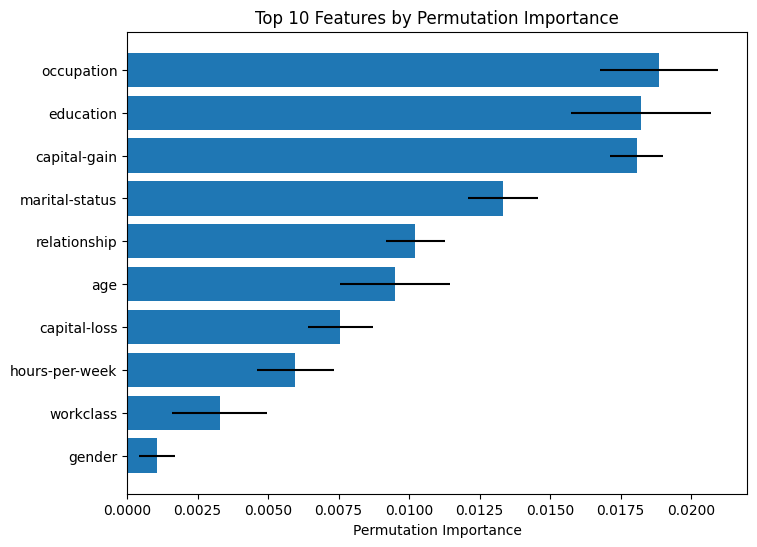

In [ ]:
# Plot the top 10 features
plt.figure(figsize=(8, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], xerr=top_10_features['std'])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features by Permutation Importance")
plt.gca().invert_yaxis()
plt.show()

Add your observations in a Markdown: Do these features make sense based on the business case?

#### observations

- Relationship: This feature indicates the family relationship status of individuals (e.g., husband, wife, unmarried). It makes sense that this feature is highly important as marital status and family roles often correlate with economic stability and income levels.

- Capital-gain: This feature represents the income from capital gains, which directly contributes to an individual's overall income. High capital gains can significantly increase a person's income, making this feature highly relevant.

- Education: Education level is a well-known predictor of income, as higher education typically correlates with higher-paying jobs and greater earning potential.

- Occupation: The type of occupation is directly related to income. Certain occupations inherently pay more than others due to the skills required, demand, and other factors.

- Age: Age can be indicative of experience and seniority in the workforce, which often correlates with higher income. However, it's also possible that income may peak at a certain age before retirement.

- Capital-loss: This feature indicates losses from investments, which can negatively affect an individual's net income. It's important to consider both gains and losses in financial assessments.

- Hours-per-week: The number of hours worked per week directly impacts income, as working more hours generally leads to higher earnings, especially in hourly wage jobs.

- Gender: Gender can influence income due to various socio-economic factors, including gender wage gaps and employment opportunities, making it a relevant feature.

- Workclass: This feature identifies the type of employer (e.g., private, government, self-employed). Different work classes come with different pay scales and job security, affecting overall income.

- Race: While it is a sensitive and complex factor, race can influence income due to systemic socio-economic disparities. It is crucial to handle this feature responsibly, ensuring that models do not perpetuate biases.



Create Explanatory Visualizations for the most important features.

Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.

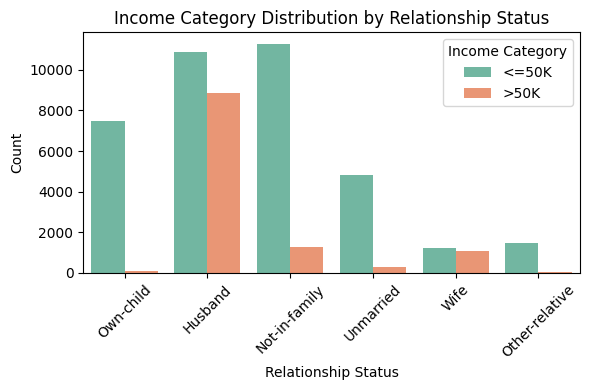

In [ ]:
# Create a bar plot for Relationship vs Income Category
plt.figure(figsize=(6, 4))
sns.countplot(x='relationship', hue='income', data=df, palette='Set2')
plt.title('Income Category Distribution by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.legend(title='Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- "Husband" and "Wife" categories have a higher proportion of individuals earning >50K compared to other relationship statuses.
Categories like "Not-in-family" and "Unmarried" predominantly fall into the <=50K income category.

- This visualization indicates that individuals who are married or in a committed relationship (husbands and wives) are more likely to have higher incomes, possibly due to combined household incomes or economic stability associated with marital status.

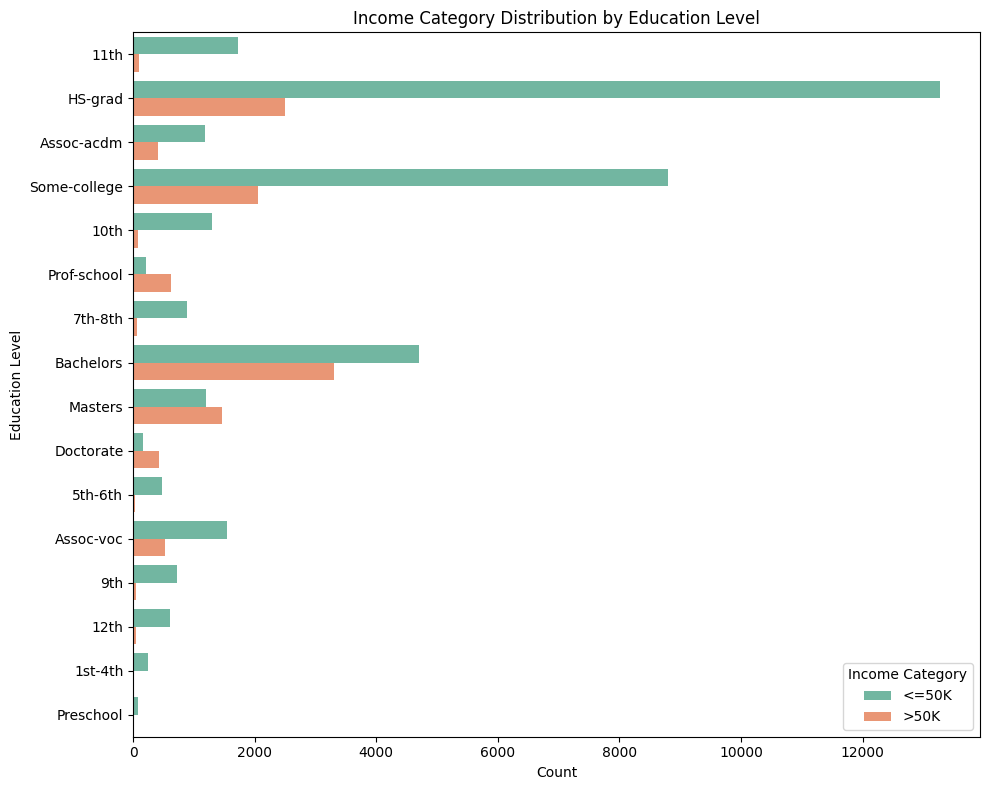

In [ ]:
# Create a count plot for Education vs Income Category
plt.figure(figsize=(10, 8))
sns.countplot(y='education', hue='income', data=df, palette='Set2')
plt.title('Income Category Distribution by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Income Category')
plt.tight_layout()
plt.show()

- Individuals with higher education levels such as "Bachelors", "Masters", and "Doctorate" have a significantly higher proportion of incomes >50K.

- Conversely, individuals with lower education levels like "HS-grad" and "Some-college" predominantly fall into the <=50K income category.

# Part 2

Choose at least one feature engineering method to apply to the data and compare the models’  performance with and without engineering.

- Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

- ​Remember to only fit the PCA on the training data and use pca.transform(X_test) to get the PCs for the testing data.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

In [ ]:
# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
PCA_X_train = pca.fit_transform(scaled_X_train)
PCA_X_test = pca.transform(scaled_X_test)

Create additional features by applying the feature engineering techniques demonstrated in the LP.

Fit and evaluate a model using your new features and compare it to your model from Part 1.

In [ ]:
def engineer_features(X):
    X['Net capital gain/loss'] = X['capital-gain'] + X['capital-loss']
    X.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
    X['family'] = X['relationship'] + X['marital-status']
    X.drop(['relationship', 'marital-status'], axis=1, inplace=True)
    X['age'] = X['age'].apply(lambda x: 'elderly' if x > 40 else 'young')

In [ ]:
X = X.rename(columns={
    'age': 'age_engineered',
    'workclass': 'workclass_engineered',
    'fnlwgt': 'fnlwgt_engineered',
    'education': 'education_engineered',
    'marital-status': 'marital-status_engineered',
    'occupation': 'occupation_engineered',
    'relationship': 'relationship_engineered',
    'race': 'race_engineered',
    'gender': 'gender_engineered',
    'capital-gain': 'capital-gain_engineered',
    'capital-loss': 'capital-loss_engineered',
    'hours-per-week': 'hours-per-week_engineered',
})

In [ ]:
def engineer_features(X):
  # Feature engineering logic here...
  # Create Series objects for the new features
  net_capital_gain_loss = pd.Series(X['Net capital gain/loss'])
  family = pd.Series(X['family'])
  age = pd.Series(X['age'])

  # Concatenate the new features into a DataFrame
  new_features_df = pd.concat([net_capital_gain_loss, family, age], axis=1)

  # Add the new features to the original X DataFrame
  X = pd.concat([X, new_features_df], axis=1)

  # Join the engineered features with the train and test sets
  PCA_X_train_engineered = X.join(X_train)
  PCA_X_test_engineered = X.join(X_test)

In [ ]:
# Separate target and features
y_train = PCA_X_train_engineered['income']
X_train_engineered = PCA_X_train_engineered.drop('income', axis=1)

y_test = PCA_X_test_engineered['income']
X_test_engineered = PCA_X_test_engineered.drop('income', axis=1)

# Train a model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_engineered, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_engineered)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)